# CNN Example Fashion_MNIST

In [1]:
## Neural Network Ex
import keras, visualkeras
from PIL import ImageFont
from keras.datasets import fashion_mnist
from keras.models import Sequential, Input, Model, load_model
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.utils import np_utils, to_categorical
from keras.utils.vis_utils import plot_model
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from matplotlib import pyplot as plt
import numpy as np

Using TensorFlow backend.
C:\Users\berka\miniconda3\envs\ml1\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\berka\miniconda3\envs\ml1\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\berka\miniconda3\envs\ml1\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\berka\miniconda3\envs\ml1\lib\site-packag

train_x shape (60000, 28, 28)
train_Y shape (60000,)
test_X shape (10000, 28, 28)
test_Y shape (10000,)


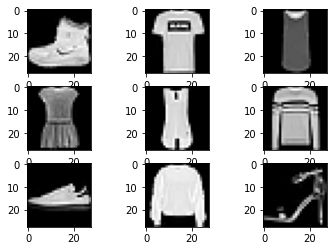

In [4]:
## Load Dataset
(train_x, train_Y), (test_X, test_Y) = fashion_mnist.load_data()

print("train_x shape", train_x.shape)
print("train_Y shape", train_Y.shape)
print("test_X shape", test_X.shape)
print("test_Y shape", test_Y.shape)

## plots first nine in dataset
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(train_x[i], cmap=plt.get_cmap('gray'))
plt.show()

In [5]:
## can reshape dataset with single color channel
classes = np.unique(train_Y)
nClasses = len(classes)
print('Total num of Outputs: ', nClasses)
print('Output Classes: ', classes)

Total num of Outputs:  10
Output Classes:  [0 1 2 3 4 5 6 7 8 9]


## Preprocess data before feeding into network
1. reshape to known pixel value 28 x28 x 1
2. change data to float32 dtype
3. rescale image to values in range 0-1 (divide by 255)
4. one hot encoding
5. train-test split

In [6]:
## Resahape
train_x = train_x.reshape(-1, 28,28, 1)
test_X = test_X.reshape(-1, 28,28, 1)

print("train_x shape", train_x.shape)
print("test_X shape", test_X.shape)

## change type and scale to 0-1
train_x = train_x.astype('float32')
test_X = test_X.astype('float32')
train_x = train_x / 255.
test_X = test_X / 255.

# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

## Train Test Split
train_X, valid_X, train_label, valid_label = train_test_split(train_x, train_Y_one_hot, test_size=0.2, random_state=13)
train_X.shape,valid_X.shape,train_label.shape,valid_label.shape

train_x shape (60000, 28, 28, 1)
test_X shape (10000, 28, 28, 1)
Original label: 9
After conversion to one-hot: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


((48000, 28, 28, 1), (12000, 28, 28, 1), (48000, 10), (12000, 10))

# Neural Network

In [12]:
## batch size: number of samples to run through model before updating params
batch_size = 64
## epochs -  num of times whole training set goes through model
epochs = 8
num_classes = 10
## Creating model, no dropout layer
fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(28,28,1),padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPool2D((2, 2),padding='same'))
fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPool2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(MaxPool2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(Dense(num_classes, activation='softmax'))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 128)        

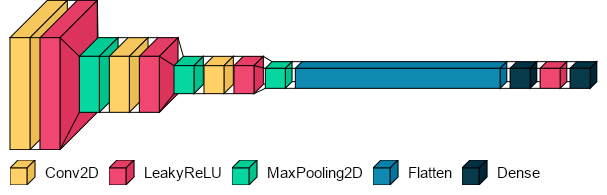

In [8]:
## compile network
fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
## Print Summary of Model
fashion_model.summary()

## model plot
keras.utils.plot_model(fashion_model, to_file='model.png', show_shapes=True,
    show_layer_names=True, rankdir='TB', expand_nested=False, dpi=96)

## visualkeras plot
font = ImageFont.truetype("arial.ttf", 15)  # using comic sans is strictly prohibited!
visualkeras.layered_view(fashion_model, legend=True, font=font)

In [9]:
## training model
fashion_train = fashion_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))


Train on 48000 samples, validate on 12000 samples
Epoch 1/8
48000/48000 [==============================] - 36s 742us/step - loss: 0.4674 - accuracy: 0.8270 - val_loss: 0.3478 - val_accuracy: 0.8733
Epoch 2/8
48000/48000 [==============================] - 35s 726us/step - loss: 0.2902 - accuracy: 0.8937 - val_loss: 0.2772 - val_accuracy: 0.8992
Epoch 3/8
48000/48000 [==============================] - 35s 720us/step - loss: 0.2401 - accuracy: 0.9116 - val_loss: 0.2409 - val_accuracy: 0.9110
Epoch 4/8
48000/48000 [==============================] - 34s 719us/step - loss: 0.2103 - accuracy: 0.9221 - val_loss: 0.2496 - val_accuracy: 0.9093
Epoch 5/8
48000/48000 [==============================] - 36s 759us/step - loss: 0.1847 - accuracy: 0.9326 - val_loss: 0.2423 - val_accuracy: 0.9135
Epoch 6/8
48000/48000 [==============================] - 53s 1ms/step - loss: 0.1618 - accuracy: 0.9393 - val_loss: 0.2258 - val_accuracy: 0.9187
Epoch 7/8
48000/48000 [==============================] - 54s 1m

Test loss: 0.2409781754642725
Test accuracy: 0.9205999970436096


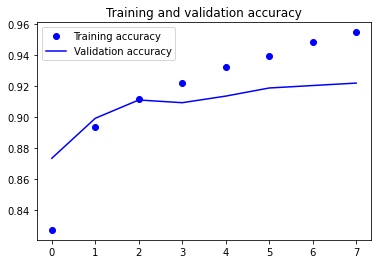

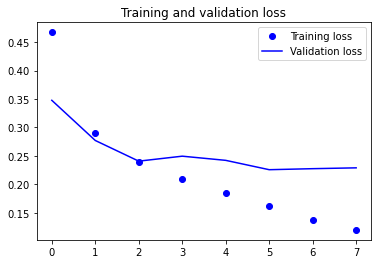

In [11]:
## test evaluation: loss and accuracy
test_eval = fashion_model.evaluate(test_X, test_Y_one_hot, verbose=0)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

## plotting accuracy and loss
accuracy = fashion_train.history['accuracy']
val_accuracy = fashion_train.history['val_accuracy']
loss = fashion_train.history['loss']
val_loss = fashion_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

## CNN with dropout layers to reduce overfitting 

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 64)         

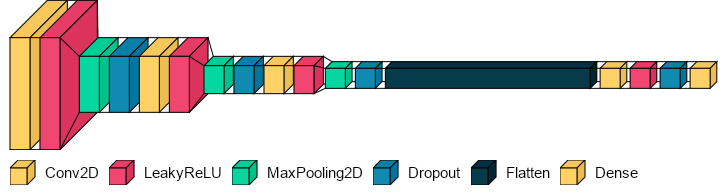

In [12]:
fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(28,28,1)))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPool2D((2, 2),padding='same'))
fashion_model.add(Dropout(0.25))
fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPool2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Dropout(0.25))
fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(MaxPool2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Dropout(0.4))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))           
fashion_model.add(Dropout(0.3))
fashion_model.add(Dense(num_classes, activation='softmax'))

## Summary
fashion_model.summary()

## visualkeras plot
font = ImageFont.truetype("arial.ttf", 15)  # using comic sans is strictly prohibited!
visualkeras.layered_view(fashion_model, legend=True, font=font)

In [14]:
## batch size: number of samples to run through model before updating params
batch_size = 64
## epochs -  num of times whole training set goes through model
epochs = 8
num_classes = 10

## Compile and Train mocel
fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
fashion_train_dropout = fashion_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))


Train on 48000 samples, validate on 12000 samples
Epoch 1/8
48000/48000 [==============================] - 42s 874us/step - loss: 0.6039 - accuracy: 0.7761 - val_loss: 0.3778 - val_accuracy: 0.8618
Epoch 2/8
48000/48000 [==============================] - 41s 861us/step - loss: 0.3837 - accuracy: 0.8578 - val_loss: 0.3175 - val_accuracy: 0.8838
Epoch 3/8
48000/48000 [==============================] - 43s 892us/step - loss: 0.3365 - accuracy: 0.8754 - val_loss: 0.2895 - val_accuracy: 0.8921
Epoch 4/8
48000/48000 [==============================] - 51s 1ms/step - loss: 0.3062 - accuracy: 0.8866 - val_loss: 0.2626 - val_accuracy: 0.9047
Epoch 5/8
48000/48000 [==============================] - 42s 876us/step - loss: 0.2859 - accuracy: 0.8936 - val_loss: 0.2554 - val_accuracy: 0.9053
Epoch 6/8
48000/48000 [==============================] - 55s 1ms/step - loss: 0.2716 - accuracy: 0.8988 - val_loss: 0.2435 - val_accuracy: 0.9116
Epoch 7/8
48000/48000 [==============================] - 31s 651us

10000/10000 [==============================] - 2s 184us/step
Test loss: 0.239748825776577
Test accuracy: 0.9128999710083008


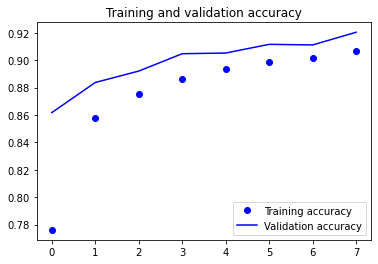

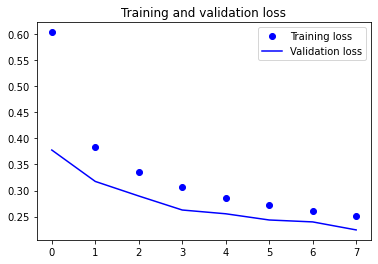

In [16]:
## save model for future
fashion_model.save("fashion_model_dropout.h5py")

test_eval = fashion_model.evaluate(test_X, test_Y_one_hot, verbose=1)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

## plotting accuracy and loss
accuracy = fashion_train_dropout.history['accuracy']
val_accuracy = fashion_train_dropout.history['val_accuracy']
loss = fashion_train_dropout.history['loss']
val_loss = fashion_train_dropout.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

## Predicted Labels

In [10]:
## Load in saved model so you don't have to train it again
fashion_model_dropout = load_model('fashion_model_dropout.h5py')

## find predicted classes
predicted_classes = fashion_model_dropout.predict(test_X)

## np.round to round floating to integer and argmax for selecting largest int
predicted_classes = np.argmax(np.round(predicted_classes), axis=1)

## number of correct predictions
correct = np.where(predicted_classes==test_Y)[0]
print("Found ", len(correct), " correct labels")

Found  9051  correct labels


## Classification Report

In [13]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.71      0.90      0.80      1000
     Class 1       0.99      0.98      0.98      1000
     Class 2       0.89      0.85      0.87      1000
     Class 3       0.95      0.87      0.90      1000
     Class 4       0.86      0.88      0.87      1000
     Class 5       0.99      0.98      0.98      1000
     Class 6       0.79      0.69      0.73      1000
     Class 7       0.96      0.97      0.97      1000
     Class 8       0.99      0.98      0.98      1000
     Class 9       0.96      0.97      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000

